# Sketch to reality: Data Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/SketchToReality # Your own path here

[Errno 2] No such file or directory: 'drive'
/content/drive


In [ ]:
import os
import torch, pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import glob

In [ ]:
sketch_path = './Data/data/sketch/tx_000000000000/'

# List of the objects (folders)

list_objects = os.listdir(sketch_path)
list_objects

['ant',
 'strawberry',
 'sword',
 'apple',
 'rhinoceros',
 'cat',
 'pear',
 'butterfly',
 'raccoon',
 'tree',
 'pig',
 'crab',
 'tank',
 'piano',
 'blimp',
 'hermit_crab',
 'violin',
 'bench',
 'snail',
 'hammer',
 'wading_bird',
 'jack-o-lantern',
 'hourglass',
 'racket',
 'turtle',
 'ape',
 'cup',
 'saw',
 'mushroom',
 'rifle',
 'bee',
 'flower',
 'dolphin',
 'couch',
 'alarm_clock',
 'scorpion',
 'giraffe',
 'candle',
 'bear',
 'dog',
 'lobster',
 'sheep',
 'pistol',
 'harp',
 'shoe',
 'church',
 'penguin',
 'duck',
 'trumpet',
 'zebra',
 'motorcycle',
 'sailboat',
 'guitar',
 'helicopter',
 'tiger',
 'windmill',
 'starfish',
 'camel',
 'chair',
 'owl',
 'mouse',
 'cabin',
 'saxophone',
 'beetle',
 'hotdog',
 'table',
 'seal',
 'wheelchair',
 'lizard',
 'jellyfish',
 'airplane',
 'chicken',
 'skyscraper',
 'kangaroo',
 'spider',
 'umbrella',
 'armor',
 'parrot',
 'bell',
 'window',
 'bat',
 'bread',
 'eyeglasses',
 'fan',
 'rabbit',
 'hat',
 'scissors',
 'spoon',
 'sea_turtle',
 'ca

In [ ]:
# Select object and see the available files
object0_path = sketch_path + '/' + list_objects[0]

list_sketches_object0 = os.listdir(object0_path)
len(list_sketches_object0)

563

In [ ]:
# Doesn't display in Jupyter Notebook, but this library will be used to visualize grids
obj0_sketch0 = Image.open(object0_path + '/' + list_sketches_object0[0])
obj0_sketch0.show()

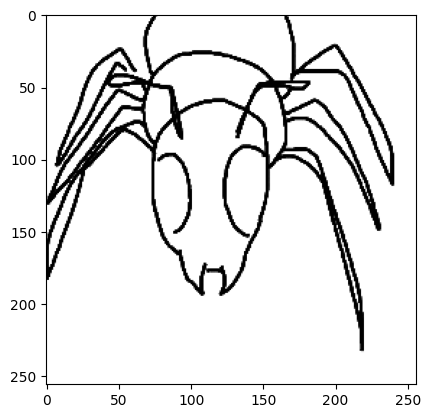

In [ ]:
# Display in Notebook
img = mpimg.imread(object0_path + '/' + list_sketches_object0[0])
plt.imshow(img)
plt.show()

In [ ]:
# Get all files from all subdirectories to then create batches
# We could have used listdir and for loops
sketch_path = './Data/data/sketch/tx_000000000000/*/*'
list_all_files = []
for file in glob.glob(sketch_path, recursive=True):
    list_all_files.append(file)

len(list_all_files)

75586

## Conversion to tensors

In [ ]:
test_sketch_path = list_all_files[0]
test_sketch = Image.open(test_sketch_path)
topil = transforms.ToPILImage()
totensor = transforms.ToTensor()

tensor_sketch = totensor(test_sketch)
tensor_sketch.size()

torch.Size([3, 256, 256])

This shows that our images are in RGB (3 channels of where values range is [0, 255]): SIZE (channels, width, height)

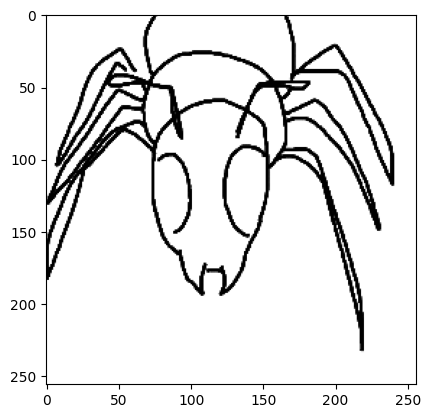

In [ ]:
# Visualization
img = topil(tensor_sketch)
plt.imshow(img)

## Create a PyTorch Dataset

In [ ]:
import sys
import os
sys.path.insert(0, os.path.abspath('./utils'))
from utils import base_config, build_dataset
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

In [24]:
# Building Dataset structure in a separate folder
# Uncomment this line to create the dataset structure. If you already have a Dataset/{train, test, val}/classes/name.png
# You don't need to execute this line (it is quite long, especially on colab)
# build_dataset.sketch_dataset()

[INFO] loading image paths...
/content/drive/MyDrive/SketchToReality/Data/data/sketch/tx_000000000000/*/*
75586
[INFO] copying training, test and validation images...
Train images: len 54423 in ./Dataset/train
Validation  images: len 7558 in ./Dataset/val
Test images: len 13605 in ./Dataset/test


In [25]:
def visualize_batch(batch, classes, dataset_type):
	# initialize a figure
	batch_size = base_config.BATCH_SIZE
	n_rows = max(1, batch_size // 4)
	fig, axes = plt.subplots(n_rows, 4, figsize=(batch_size, batch_size))
	fig.suptitle(f"{dataset_type} batch")
	axes = axes.flatten()
	# loop over the batch size
	for i in range(0, base_config.BATCH_SIZE):
		# create a subplot
		ax = axes[i]
		# grab the image, convert it from channels first ordering to
		# channels last ordering, and scale the raw pixel intensities
		# to the range [0, 255]
		image = batch[0][i].cpu().numpy()
		image = image.transpose((1, 2, 0))
		image = (image * 255.0).astype("uint8")
		# grab the label id and get the label from the classes list
		idx = batch[1][i]
		label = classes[idx] # In the DataLoader class
		# show the image along with the label
		ax.imshow(image)
		ax.set_title(label)
		ax.axis("off")
	# show the plot
	plt.tight_layout()
	plt.show()

In [26]:
# initialize our data augmentation functions
resize = transforms.Resize(size=(base_config.INPUT_HEIGHT,
        base_config.INPUT_WIDTH))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)

# initialize our training and validation set data augmentation
# pipeline
trainTransforms = transforms.Compose([resize, hFlip, vFlip, rotate,
        transforms.ToTensor()])
valTransforms = transforms.Compose([resize, transforms.ToTensor()])

In [27]:
# We formatted our data directory to use ImageFolder from torchvision

# initialize the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root=base_config.TRAIN,
        transform=trainTransforms)
testDataset = ImageFolder(root=base_config.TEST,
        transform=trainTransforms)
valDataset = ImageFolder(root=base_config.VAL,
        transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(
        len(trainDataset)))
print("[INFO] test dataset contains {} samples...".format(
        len(testDataset)))
print("[INFO] validation dataset contains {} samples...".format(
        len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 54423 samples...
[INFO] test dataset contains 21163 samples...
[INFO] validation dataset contains 7558 samples...


In [28]:
trainDataset

Dataset ImageFolder
    Number of datapoints: 54423
    Root location: ./Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.25)
               RandomVerticalFlip(p=0.25)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [29]:
# create training and validation set dataloaders
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset,
        batch_size=base_config.BATCH_SIZE, shuffle=True)
testDataLoader = DataLoader(testDataset,
        batch_size=base_config.BATCH_SIZE, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=base_config.BATCH_SIZE)

[INFO] creating training and validation set dataloaders...


[INFO] visualizing training and validation batch...


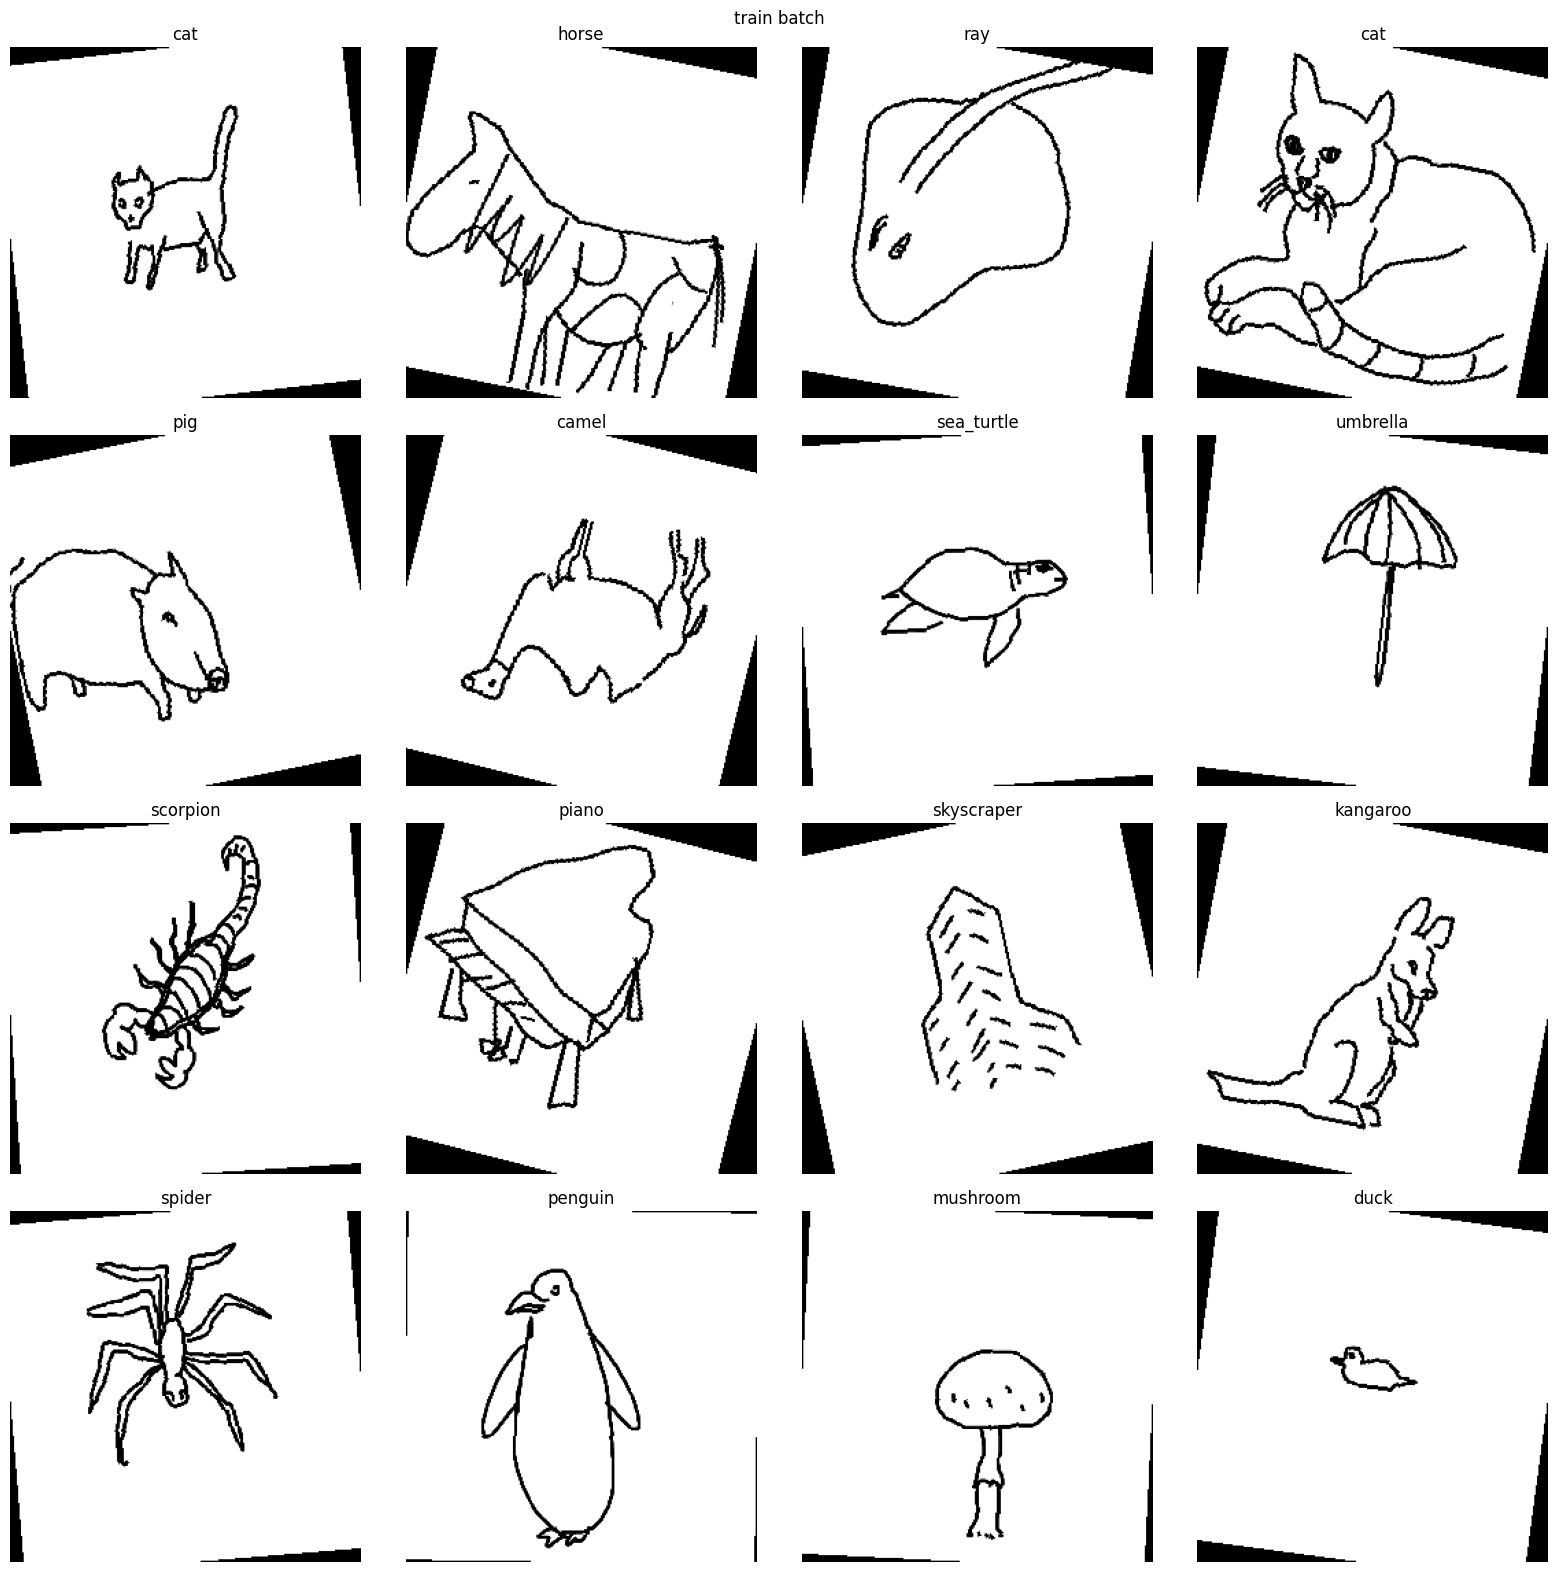

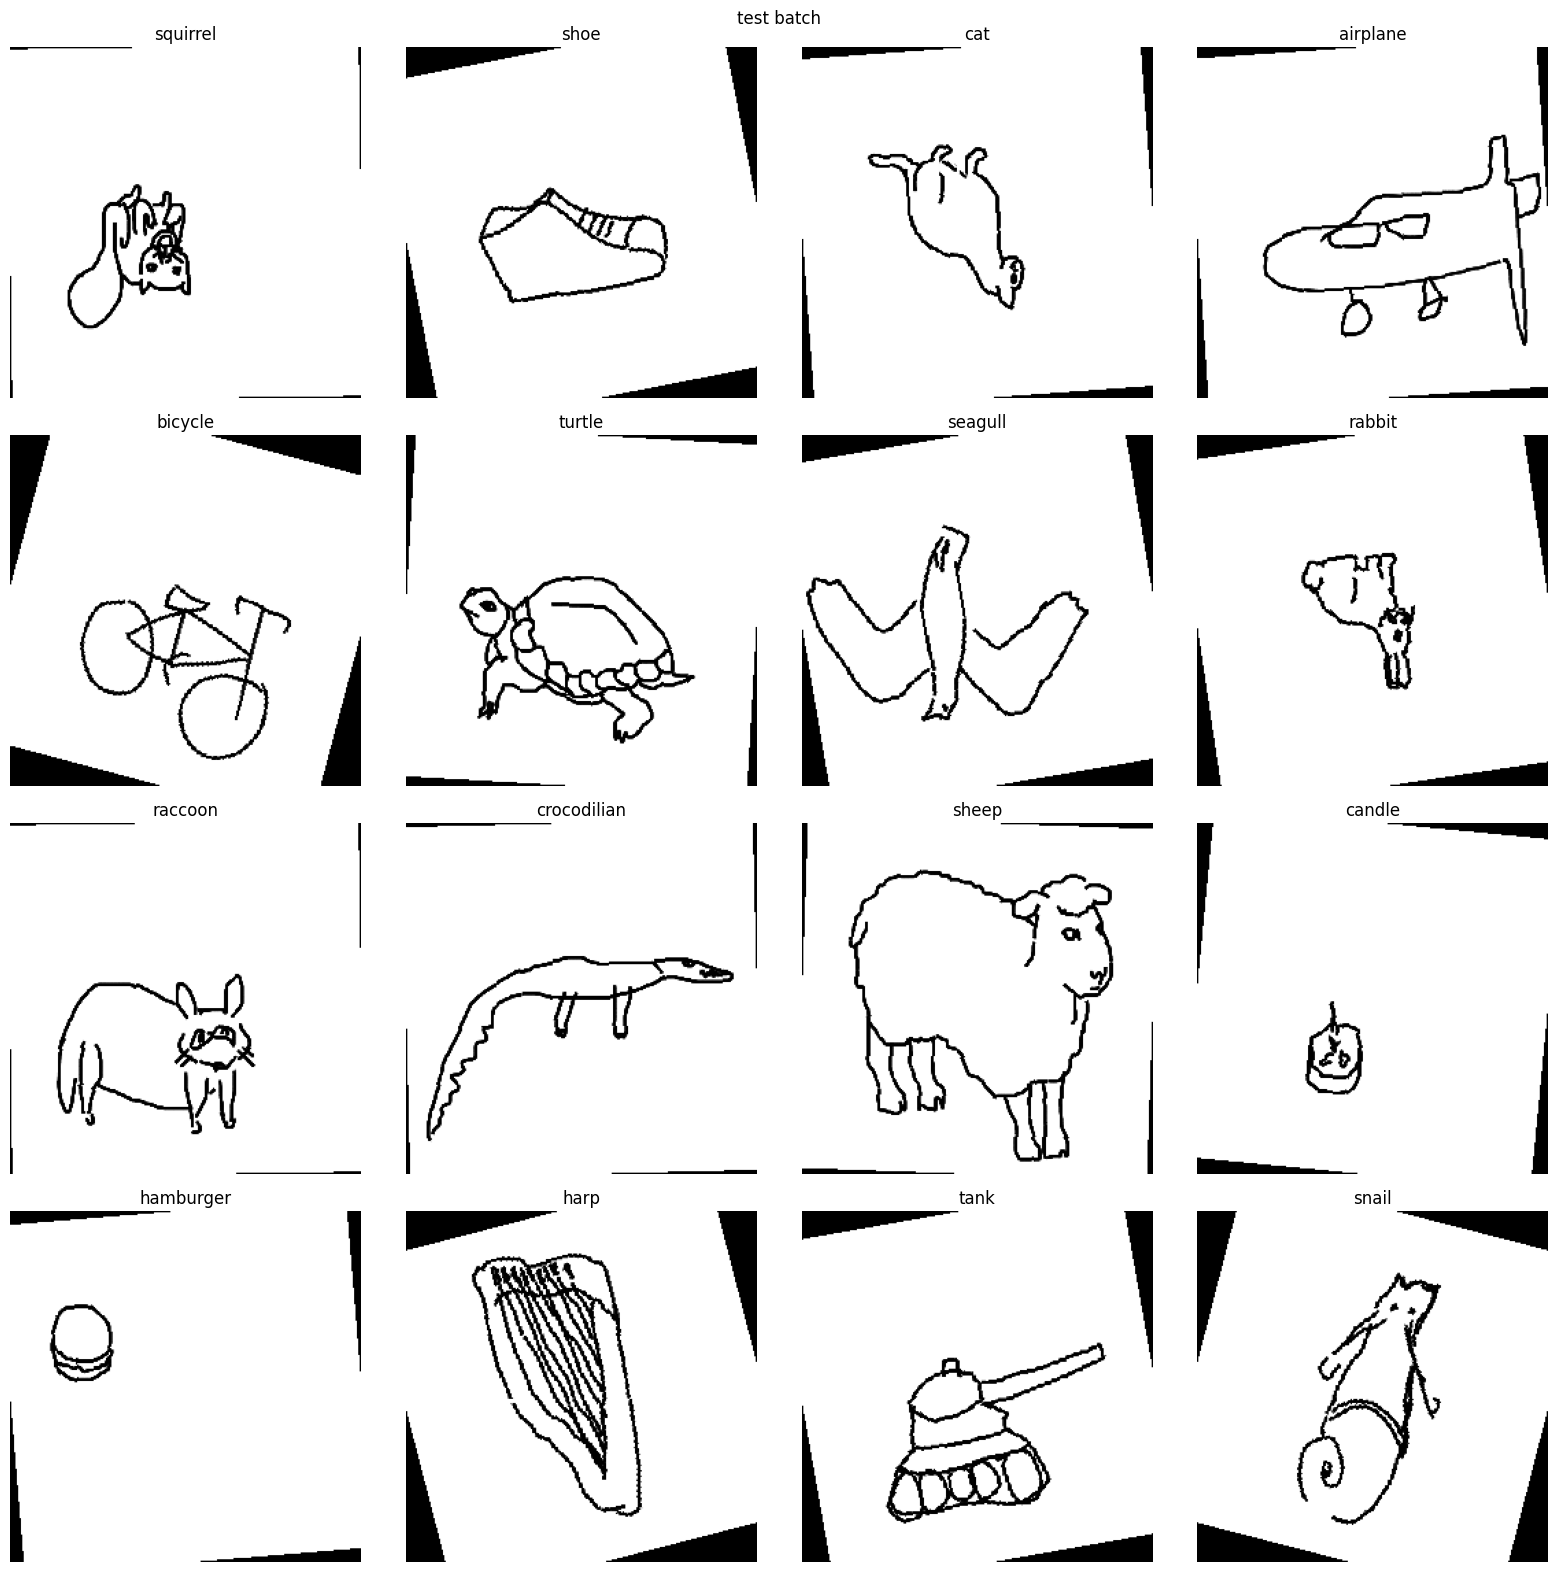

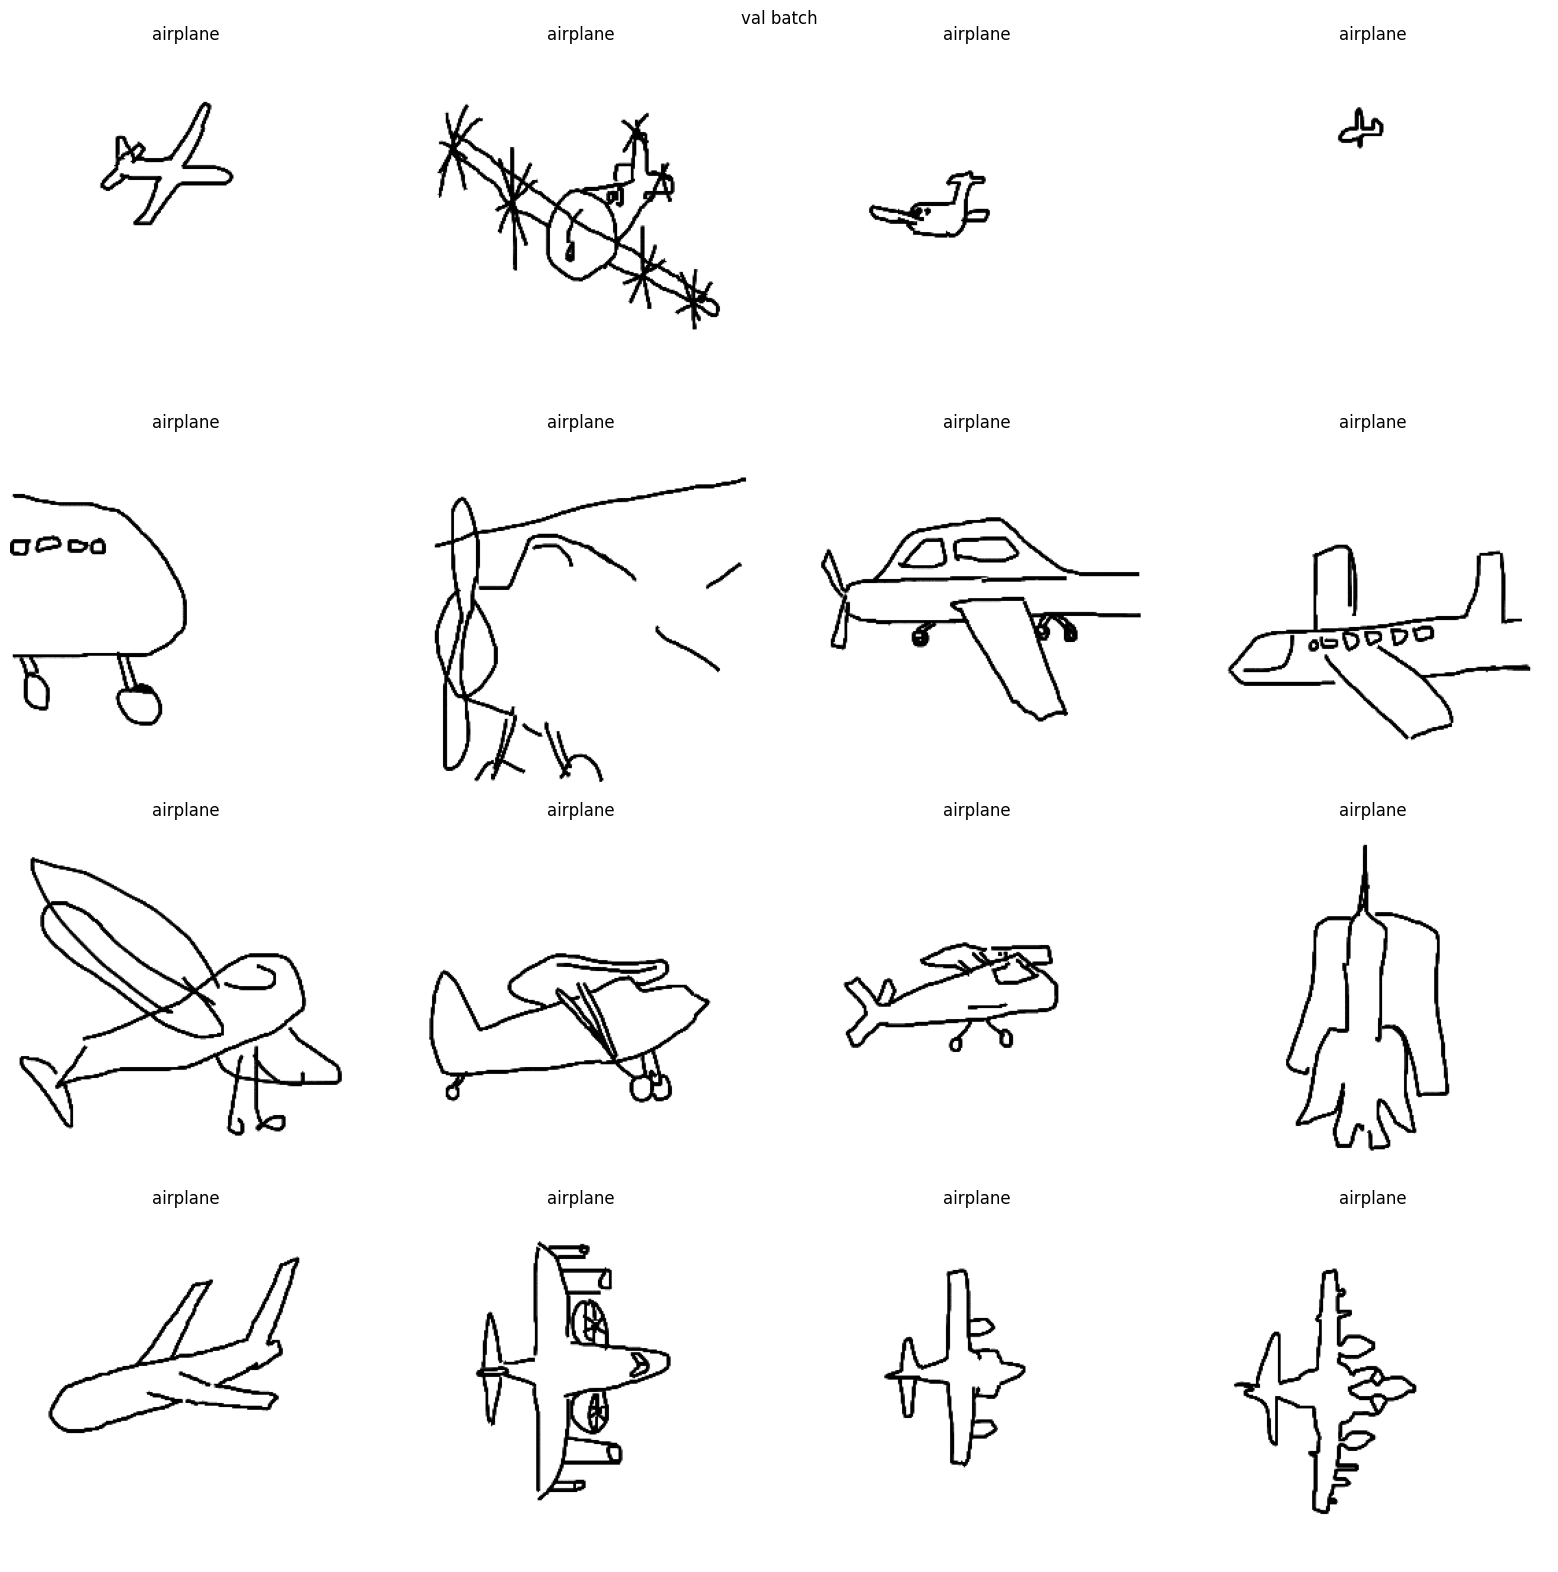

In [30]:
# grab a batch from both training and validation dataloader
trainBatch = next(iter(trainDataLoader))
testBatch = next(iter(testDataLoader))
valBatch = next(iter(valDataLoader))
# visualize the training, test and validation set batches
print("[INFO] visualizing training and validation batch...")
visualize_batch(trainBatch, trainDataset.classes, "train")
visualize_batch(testBatch, testDataset.classes, "test")
visualize_batch(valBatch, valDataset.classes, "val")